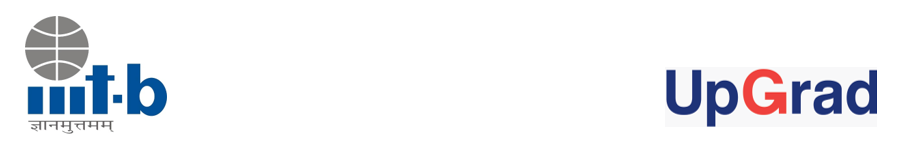

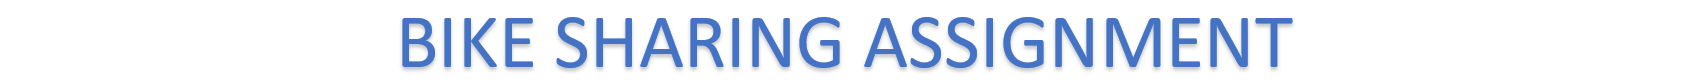

# __Problem Statement__

This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes. You will need to submit a Jupyter notebook for the same.<br>

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Steps as per the CRISP-DM framework:
- Business Understanding
- Data Understanding
- Data Preparation
- Data Modelling
- Model Evaluation
- Model Deployment (not applicable to the assignment)

# 1. Business Understanding

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contacted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.

The company wants to know:<br>
Which variables are significant in predicting the demand for shared bikes?<br>
How well those variables describe the bike demands?<br>
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Data Dictionary

- __instant__: record index
- __dteday__: date
- __season__: season (1:spring, 2:summer, 3:fall, 4:winter)
- __yr__: year (0: 2018, 1:2019)
- __mnth__: month ( 1 to 12)
- __holiday__: weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- __weekday__: day of the week
- __workingday__: if day is neither weekend nor holiday is 1, otherwise is 0.
- __weathersit__: 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- __temp__: temperature in Celsius
- __atemp__: feeling temperature in Celsius
- __hum__: humidity
- __windspeed__: wind speed
- __casual__: count of casual users
- __registered__: count of registered users
- __cnt__: count of total rental bikes including both casual and registered

# 2. Data Understanding

## Steps to be followed:

- Importing, reading and understanding the data
    - Importing dataset
    - Reading dataset
    - Checking for shape of the dataset
    - Checking for null values
    - Checking for statistical summary
- Data Cleaning
    - Creating Derived Metrics (example, week of the month from dteday column)
    - Checking for outliers
    - Removing columns which are not required by the model
- Data Analysis & Visualization
    - Univariate Analysis
    - Bivariate Analysis
        - Analysing the categorical variables
        - Analysing the continuous variables    

## a) Importing, reading and understanding the data

### Importing the necessary libraries

In [1]:
# suppressing warnings

import warnings
warnings.filterwarnings('ignore')


# importing all the necessary libraries

import numpy as np # for mathematical computations
import pandas as pd # for manipulating data
import matplotlib.pyplot as plt # for visualization
%matplotlib inline
import seaborn as sns # for visualization

import statsmodels.api as sm # for building linear regression models
from sklearn.model_selection import train_test_split # to split the dataset into train set and test set
from sklearn.preprocessing import MinMaxScaler # for rescalimg of variables
from sklearn.feature_selection import RFE # for using the Recursive Feature Selection method for feature selection
from sklearn.linear_model import LinearRegression # for using LinearRegression class to run RFE method
from sklearn.metrics import mean_squared_error # for checking the mean squared error
from sklearn.metrics import r2_score # to check the r-squared
from statsmodels.stats.outliers_influence import variance_inflation_factor # to compute the VIF of the variables

### Importing and reading the dataset

In [2]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### From the above data, we can see that the variables, 'season', 'mnth', 'weekday', 'weathersit' all are the categorical variables other than binary variables.<br>For better readability for our analysis, we will replace the numerical values of these variables with the associated categorical string values as per the data dictionary. This will further help us in creating dummy variables during data preparation for modelling.

In [3]:
# replacing the numerical values of 'season' variable with its associated categorical string values

df.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace=True)

In [4]:
# replacing the numerical values of 'mnth' variable with its associated categorical string values

df.mnth.replace({1:'january',
                 2:'february',
                 3:'march',
                 4:'april',
                 5:'may',
                 6:'june',
                 7:'july',
                 8:'august',
                 9:'september',
                10:'october',
                11:'november',
                12:'december'}, inplace=True)

#### Looking at the actual calender of the year 2018, it is visible that on 1st January 2018, it was monday.<br>In our dataset, the weekday for 01-01-2018 is mentioned as 6. Hence, we will consider 6 as monday, 0 as tuesday and so on.

In [5]:
# replacing the numerical values of 'weekday' variable with its associated categorical string values

df.weekday.replace({6:'monday',
                    0:'tuesday',
                    1:'wednesday',
                    2:'thursday',
                    3:'friday',
                    4:'saturday',
                    5:'sunday'}, inplace = True)

In [6]:
# replacing the numerical values of 'weathersit' variable with its associated categorical string values

df.weathersit.replace({1:'Clear_Few_Clouds',
                       2:'Mist_Cloudy',
                       3:'Light_Snow_Light_Rain',
                       4:'Heavy_Rain_Ice_Pallets_Thunderstorm_Mist'}, inplace = True)

### Checking the shape of the dataset

In [7]:
df.shape

(730, 16)

#### There are total 730 rows and 16 columns in the dataset.

### Checking for any null values in the dataset and also the datatype of each column

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


#### As we see, there are no missing values in our dataset.

### Checking for statistical summary of the dataset

In [9]:
df.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### We don't really see any outliers here and the values pretty much make sense.

## b) Data Cleaning

### Creating Derived Metrics

#### Here, from the date column, we will try to extract the week of the month and will term it as 'wom'. This might help us in analysing as to which week has the highest demand. There can be a possibility that the later weeks of the month might have lesser bike demands due to budget crunch with the customers to hire bikes and choose alternate options.

In [10]:
# Changing the datatype of 'dteday' column to 'datetime' format

df['dteday'] = pd.to_datetime(df.dteday, dayfirst = True)

In [11]:
# Creating a custom formula in order to compute the number of week of the month

from datetime import datetime, timedelta

def week_of_month(date):
    month = date.month
    week = 0
    while date.month == month:
        week += 1
        date -= timedelta(days=7)

    return week

In [12]:
# Creating a derived metric 'wom' with the help of custom formula 'week_of_month'

df['wom'] = df.dteday.apply(week_of_month)
df.wom.replace({1:'1st week',
                2:'2nd week',
                3:'3rd week',
                4:'4th week',
                5:'5th week'}, inplace = True)

### Checking for outliers

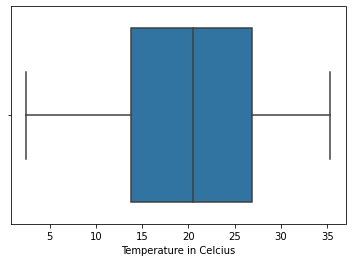

In [13]:
# Checking for outliers in 'temp' column
sns.boxplot(df.temp)
plt.xlabel("Temperature in Celcius")
plt.show()

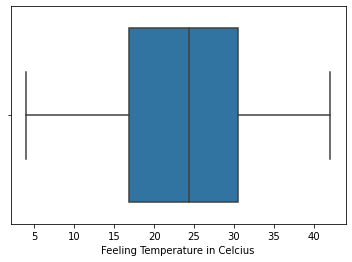

In [14]:
# Checking for outliers in 'atemp' column
sns.boxplot(df.atemp)
plt.xlabel("Feeling Temperature in Celcius")
plt.show()

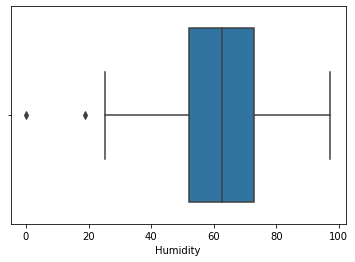

In [15]:
# Checking for outliers in 'hum' column
sns.boxplot(df.hum)
plt.xlabel("Humidity")
plt.show()

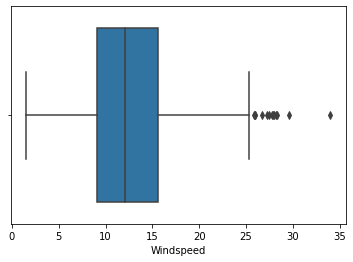

In [16]:
# Checking for outliers in 'windspeed' column
sns.boxplot(df.windspeed)
plt.xlabel("Windspeed")
plt.show()

#### The above plots look pretty much continuous, hence, we do not need to do any outlier removal here. Although, there are a few values lying outside the box plots for 'hum' and 'windspeed', the scale is not that large and we can keep these values anyway.

### Removing the columns which are not required in the analysis

Droppping certain columns as they are not of much help in our modelling
- instant - It is a unique value that corresponds to the number of the record. So, it's not helping us in the modelling.
- dteday - We will drop this column as well, since we already have individual columns with month and year and also a new derived metric 'wom'.
- casual & registered - These two variables are directly related to our target variable (which is 'cnt') as the sum of these two gives us the 'cnt' variable. Ultimately, our target variable is 'cnt' and we don't want to create a situation of data leakage in our model.

In [17]:
df = df.drop(['instant','dteday','casual','registered'], axis=1)
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,wom
0,spring,0,january,0,monday,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985,1st week
1,spring,0,january,0,tuesday,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801,1st week
2,spring,0,january,0,wednesday,1,Clear_Few_Clouds,8.050924,9.47025,43.7273,16.636703,1349,1st week
3,spring,0,january,0,thursday,1,Clear_Few_Clouds,8.200000,10.60610,59.0435,10.739832,1562,1st week
4,spring,0,january,0,friday,1,Clear_Few_Clouds,9.305237,11.46350,43.6957,12.522300,1600,1st week
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,december,0,saturday,1,Mist_Cloudy,10.420847,11.33210,65.2917,23.458911,2114,4th week
726,spring,1,december,0,sunday,1,Mist_Cloudy,10.386653,12.75230,59.0000,10.416557,3095,4th week
727,spring,1,december,0,monday,0,Mist_Cloudy,10.386653,12.12000,75.2917,8.333661,1341,5th week
728,spring,1,december,0,tuesday,0,Clear_Few_Clouds,10.489153,11.58500,48.3333,23.500518,1796,5th week


## c) Data Analysis & Visualisation

## Univariate Analysis

In [18]:
# Creating a function 'create_distplot' since we will keep needing to create plots under univariate analysis
# So in order to avoid repetitive code writing, we will create this function here.

def create_distplot(x, x_label, y, palette_color):
    plt.figure(figsize=[10,8])
    sns.set_style("dark")
    sns.distplot(df[x], bins=25, color=palette_color)
    plt.title(y, fontsize=15)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel("Density",fontsize=14)
    plt.show()

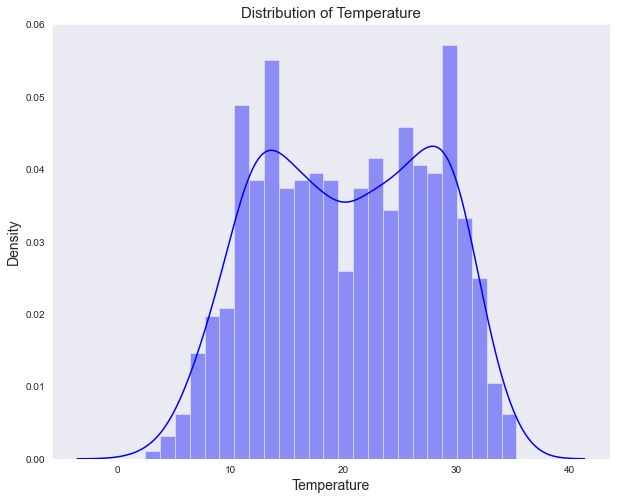

In [19]:
# analysing 'temp' column

create_distplot('temp', 'Temperature', 'Distribution of Temperature', 'b')

#### From the above plot, we can infer that the highest temperature value that we see is around 35 degrees Celcius and the lowest temperature is around 2-3 degrees Celcius. On most of the days, the temperature is around 30.

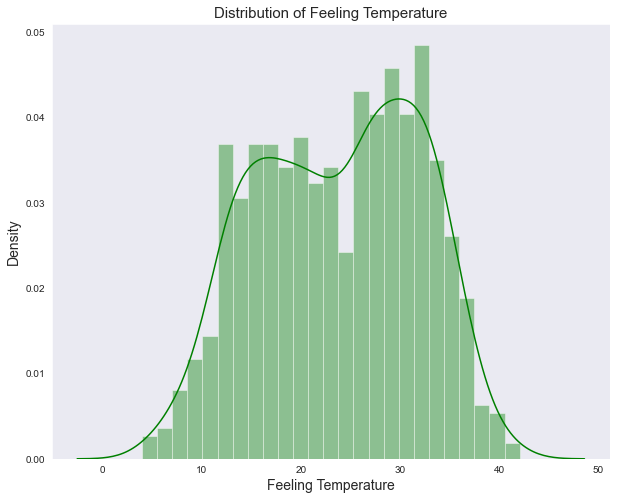

In [20]:
# analysing 'atemp' column

create_distplot('atemp', 'Feeling Temperature', 'Distribution of Feeling Temperature', 'g')

#### Similar to the earlier plot, from the above plot, we can infer that the highest temperature value that we see is around 40-42 degrees Celcius and the lowest temperature is around 5 degrees Celcius. On most of the days, the feeling temperature is around 32-33.

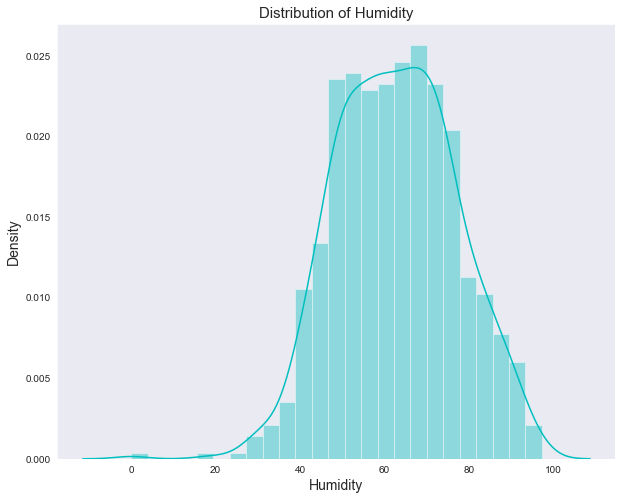

In [21]:
# analysing 'hum' column

create_distplot('hum', 'Humidity', 'Distribution of Humidity', 'c')

#### From the above plot, we can infer that on most of the days, the humidity is around 70-75%.

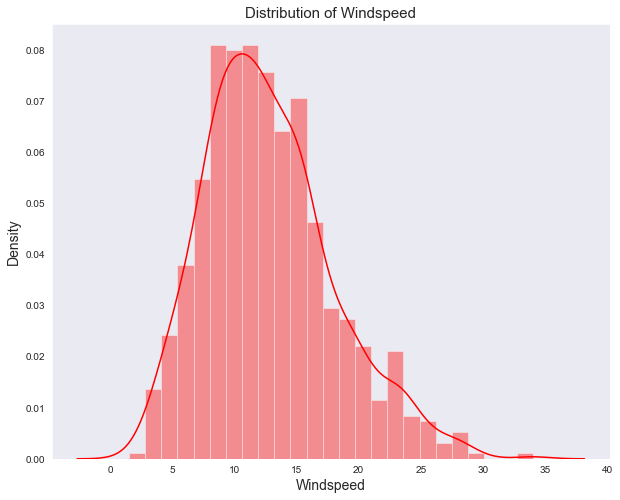

In [22]:
# analysing 'windspeed' column

create_distplot('windspeed', 'Windspeed', 'Distribution of Windspeed', 'r')

#### From the above plot, we can infer that the windspeed is between 8-15 for most of the days.

## Bivariate Analysis

### Analysing the categorical variables

In [23]:
# Creating a function 'create_bar' since we will keep needing to create plots to analyse the categorical variables.
# So in order to avoid repetitive code writing, we will create this function here.

def create_bar(a, a_label, rot):
    
    # this function takes in 02 variables:
    # a = the variable to be analysed (string)
    # a_label = label description (string)
    # rot = rotation of xticks (either 0 or 90)
    
    plt.figure(figsize=[8,5])
    sns.barplot(data=df, x=a, y='cnt')
    plt.xlabel(a_label,fontsize=14)
    plt.ylabel("Bike Demand",fontsize=14)
    plt.xticks(rotation=rot)
    plt.show()

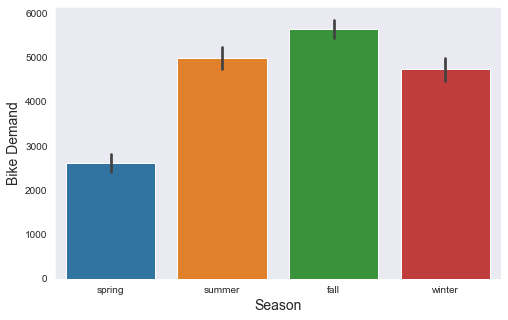

In [24]:
# Creating a bar plot between the 'season' and 'cnt'

create_bar('season', 'Season', 0)

#### 'fall' has the highest demand for bikes, then there is 'summer' and then 'winter'. 'spring' has the lowest demand for bikes.

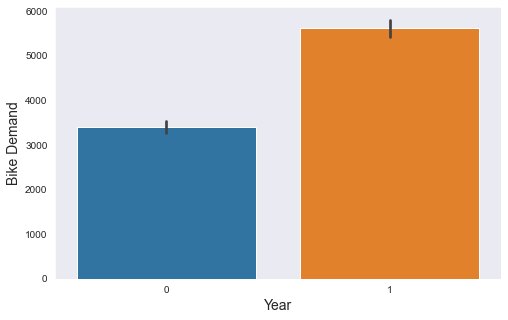

In [25]:
# Creating a bar plot between the 'yr' and 'cnt'

create_bar('yr', 'Year', 0)

#### As we move from 2018 to 2019, we see that the bike demand is increasing, possibly, there is a growing demand for such a business. The organisation should continue to use the policies that were used in 2019 after the pandemic. It is sure that the business will grow in the coming year as the demand is increasing with years.

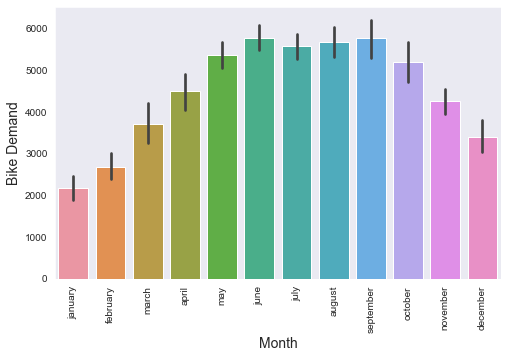

In [26]:
# Creating a bar plot between the 'mnth' and 'cnt'

create_bar('mnth', 'Month', 90)

#### The highest demand of bikes is between the months of june and september, outside which, the demand begins to drop. This can be a crucial predictor to determine the bikes demand.

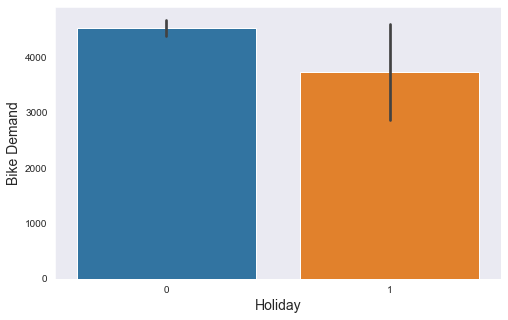

In [27]:
# Creating a bar plot between the 'holiday' and 'cnt'

create_bar('holiday', 'Holiday', 0)

#### Here, we can see that the bikes demand is higher when there is no holiday. This can mean that most of the customers are working professionals who use bikes for daily commute to & from office.

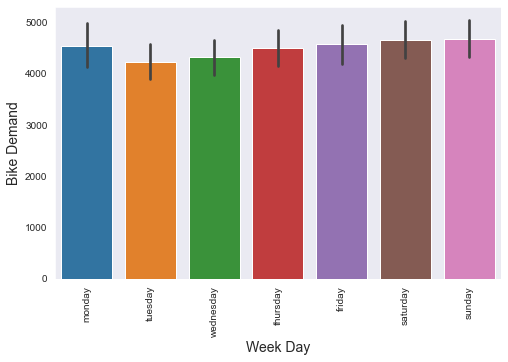

In [28]:
# Creating a bar plot between the 'weekday' and 'cnt'

create_bar('weekday', 'Week Day', 90)

#### The bike demand is the lowest on tuesdays while there is not much difference in bike demand on the other days of the week.

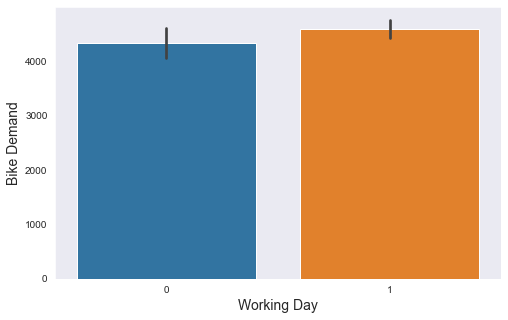

In [29]:
# Creating a bar plot between the 'workingday' and 'cnt'

create_bar('workingday', 'Working Day', 0)

#### Just to re-confirm our earlier theory, this plot tells us that bike demand is higher on working days.

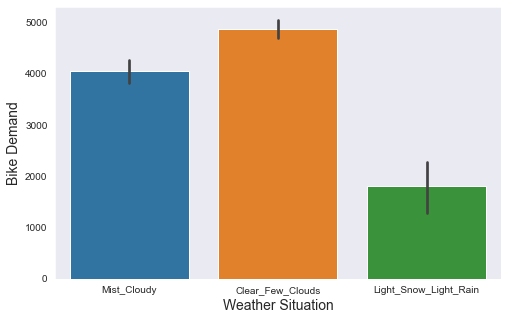

In [30]:
# Creating a bar plot between the 'weathersit' and 'cnt'

create_bar('weathersit', 'Weather Situation', 0)

#### From the above bar, we can infer that the highest demand for bike is there when the weather is Clear or there are Few clouds while it is the lowest when there is Light Snow or Light Rain + Thunderstorm + Scattered clouds or Light Rain + Scattered clouds.

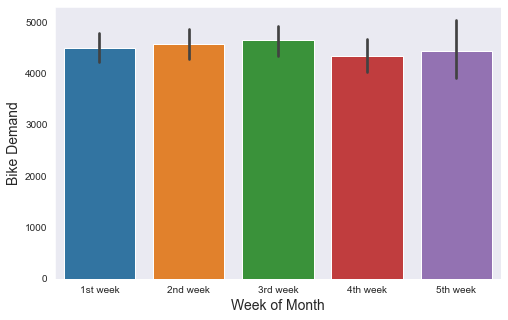

In [31]:
# Creating a bar plot between the 'wom' and 'cnt'

create_bar('wom', 'Week of Month', 0)

#### From the above plot, we can see that the bike demand increases from 1st week to 3rd week and then it drops. Although, there is not much difference, 3rd week has the highest bikes demand.

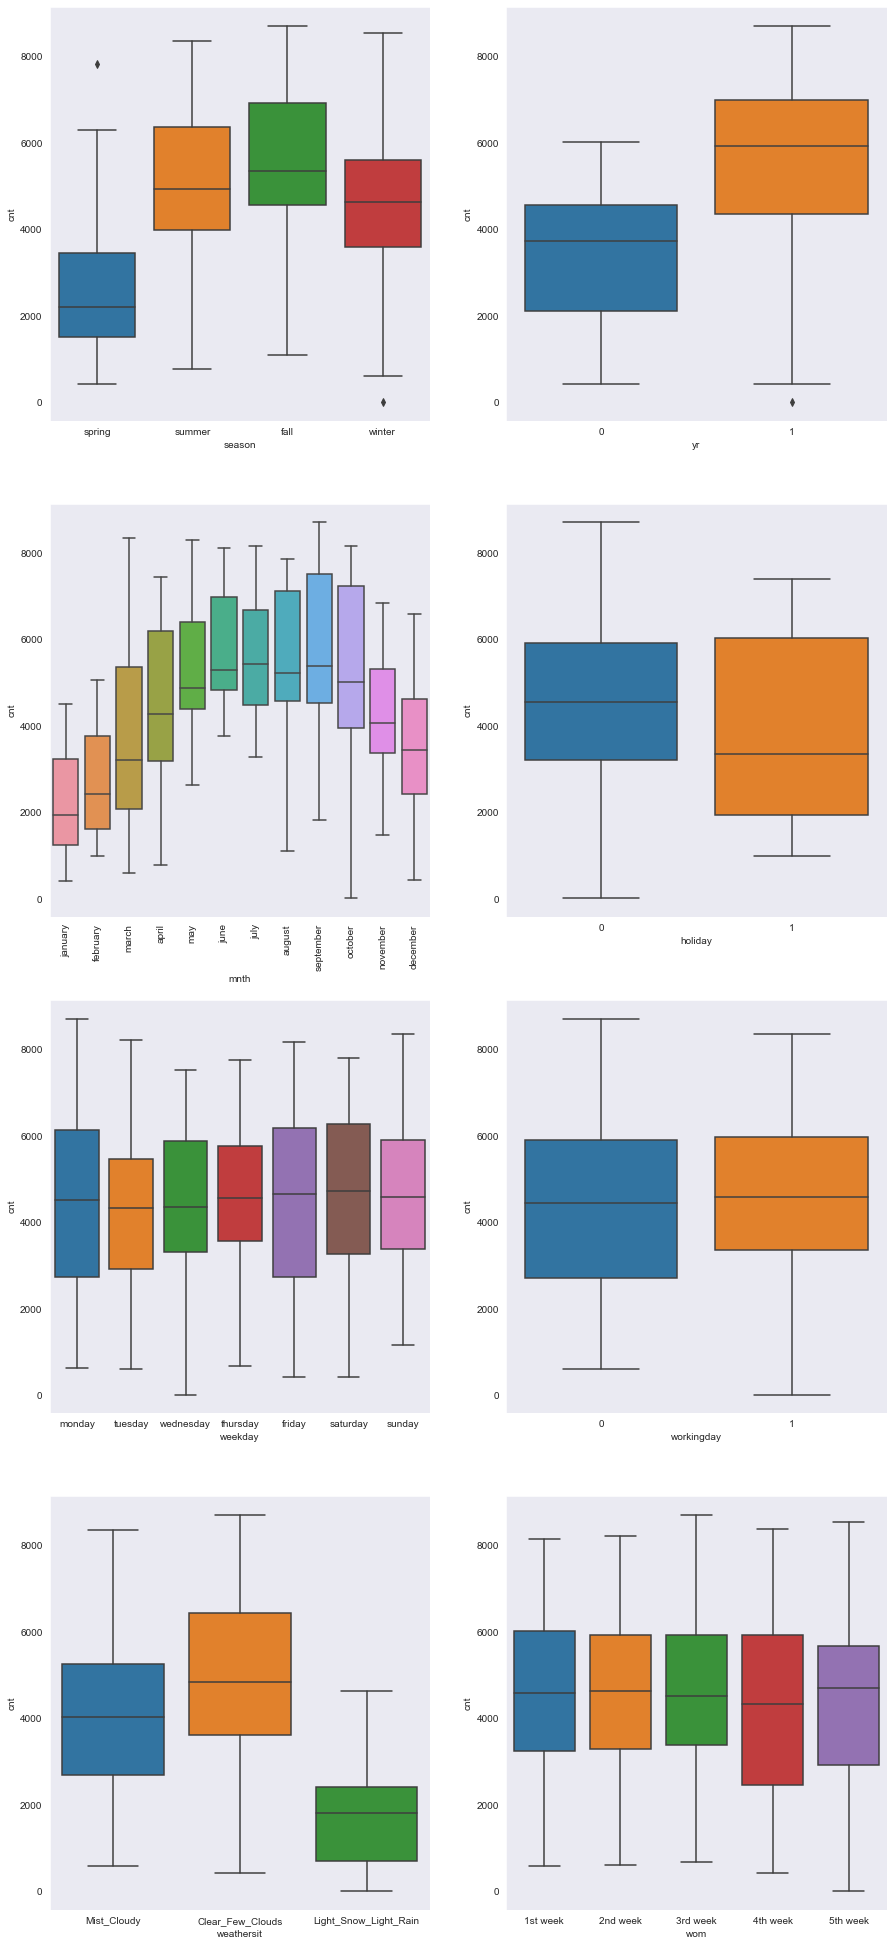

In [32]:
# Analysing all the categorical variables together by creating boxplots

plt.figure(figsize=[15,35])

plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df )

plt.subplot(4,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df )

plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df )
plt.xticks(rotation=90)

plt.subplot(4,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df )

plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df )

plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df )

plt.subplot(4,2,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df )

plt.subplot(4,2,8)
sns.boxplot(x = 'wom', y = 'cnt', data = df )

plt.show()

### Analysing the continuous variables

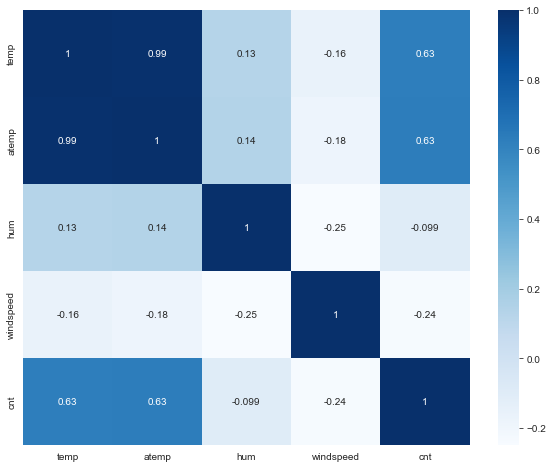

In [33]:
# creating heatmap for the continuous variables to check for correlation

plt.figure(figsize=[10,8])
sns.heatmap(df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap='Blues')
plt.show()

#### From the above heatmap, we can infer that 'temp' and 'atemp' have the highest correlation. 'cnt' has the highest correlation with both 'temp' and 'atemp'. Also, we see that 'cnt' has negative correlation with 'hum' and 'windspeed' which means that with increase in humidity and windspeed, the bike demand decreases. These can be good predictors for bike demand as well.

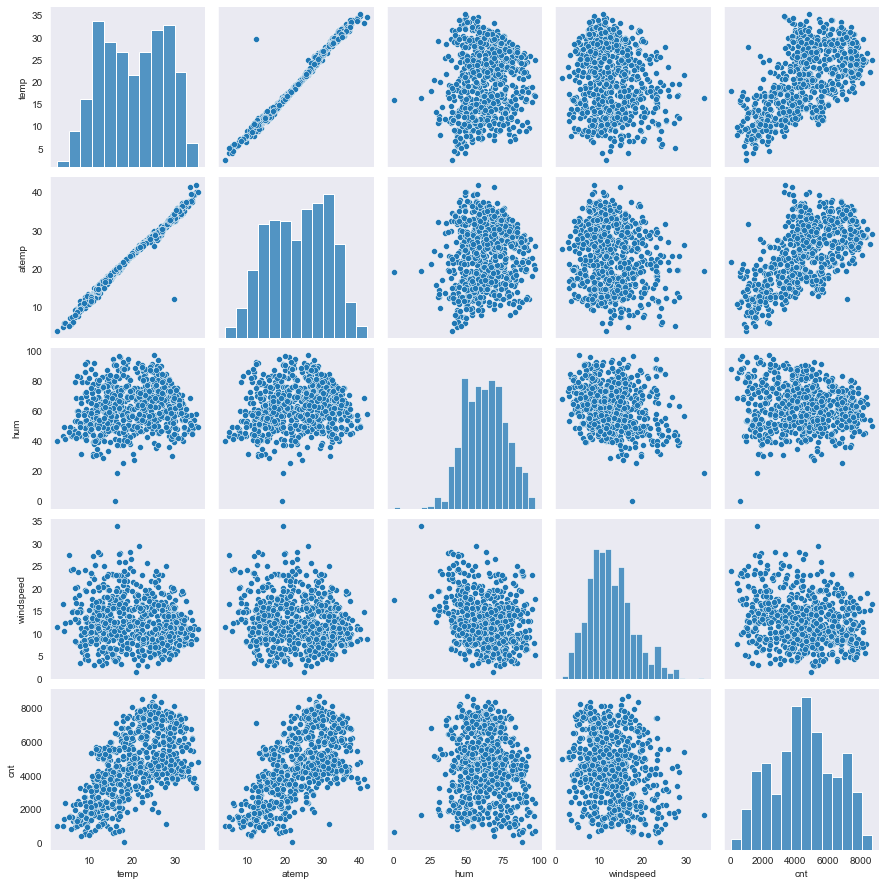

In [34]:
# creating scatter plots between all the continuous variables using pairplot

sns.pairplot(df, vars = ['temp','atemp','hum','windspeed','cnt'])
plt.show()

In [35]:
# As seen from the above plots and even the heat map, there is a very strong correlation betwen 'temp' & 'atemp'.
# 'temp' is the average temperature on that day while 'atemp' is the actual temperature felt by the people that day.
# It is quite understood from the data that 'atemp' is normally higher than 'temp'.
# The people will base their decision of renting a bike on 'atemp' rather than 'temp' because 'atemp' is what they feel.
# Hence, we will drop one of these; more preferably, we will drop 'temp'

df.drop(['temp'], axis=1, inplace = True)

# 3. Data Preparation

#### Steps:
- Encoding (Creating dummy variables)
- Train Test Split
- Feature Rescaling of the train set

In [36]:
# importing the datset

df

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,wom
0,spring,0,january,0,monday,0,Mist_Cloudy,18.18125,80.5833,10.749882,985,1st week
1,spring,0,january,0,tuesday,0,Mist_Cloudy,17.68695,69.6087,16.652113,801,1st week
2,spring,0,january,0,wednesday,1,Clear_Few_Clouds,9.47025,43.7273,16.636703,1349,1st week
3,spring,0,january,0,thursday,1,Clear_Few_Clouds,10.60610,59.0435,10.739832,1562,1st week
4,spring,0,january,0,friday,1,Clear_Few_Clouds,11.46350,43.6957,12.522300,1600,1st week
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,december,0,saturday,1,Mist_Cloudy,11.33210,65.2917,23.458911,2114,4th week
726,spring,1,december,0,sunday,1,Mist_Cloudy,12.75230,59.0000,10.416557,3095,4th week
727,spring,1,december,0,monday,0,Mist_Cloudy,12.12000,75.2917,8.333661,1341,5th week
728,spring,1,december,0,tuesday,0,Clear_Few_Clouds,11.58500,48.3333,23.500518,1796,5th week


## a) Encoding of Data

- __Converting Binary Variables into 0 & 1__ - These variables are 'yr', 'holiday', 'workingday'. As these variables are already in 0 & 1 format, we don't have to perform this step.
- __Creating dummy variables for categorical variables other than binary variables__ -  These variables are 'season', 'mnth', 'weekday', 'weathersit', 'wom'. In the following lines, we will create dummy for each of these variables.

In [37]:
# creating dummy variables for 'season'

dummy_season = pd.get_dummies(df.season, drop_first = True)

In [38]:
# creating dummy variables for 'mnth'

dummy_mnth = pd.get_dummies(df.mnth, drop_first = True)

In [39]:
# creating dummy variables for 'weekday'

dummy_weekday = pd.get_dummies(df.weekday, drop_first = True)

In [40]:
# creating dummy variables for 'weathersit'

dummy_weathersit = pd.get_dummies(df.weathersit, drop_first = True)

In [41]:
# creating dummy variables for 'wom'

dummy_wom = pd.get_dummies(df.wom, drop_first = True)

In [42]:
# concatenating all the above dummy variables with the main 'df' dataframe

df = pd.concat([df, dummy_season, dummy_mnth, dummy_weekday, dummy_weathersit, dummy_wom], axis = 1)

In [43]:
# now, since we have created the dummy variables for the above categorical variables, we don't need the above variables.
# so we will drop them.

df = df.drop(['season', 'mnth', 'weekday', 'weathersit', 'wom'], axis = 1)

## b) Train-Test Split

In [44]:
# creating train_test_split with 70-30 ratio

df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

## c) Feature Rescaling of the Train Set

In [45]:
# Instantiating an object 'scaler'

scaler = MinMaxScaler()

In [46]:
# Creating a list of numeric variables whose scaling needs to be done

numerical_vars = ['atemp', 'hum', 'windspeed', 'cnt']

# Fitting on train set

df_train[numerical_vars] = scaler.fit_transform(df_train[numerical_vars])

# 4. Data Modelling

## Steps:
- Create X and y
- Feature Selection using RFE method
- Building a model with the top 20 significant variables considered by RFE
- Calculating VIF
- Rebuilding model by dropping insignificant variables
- Calculating VIF
- Finding the best model

## Create X and y

In [47]:
# create X and y

y_train = df_train.pop('cnt')
X_train = df_train

## Feature Selection using RFE method

In [48]:
# feature selection using Recursive Feature Elimination (RFE) method.
# We will first use RFE appraoch to select the first 20-most significant predictor variables.
# Then we will be checking further for the most significant variables through manual feature elimination.

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [49]:
# checking for the columns and their ranking as per RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('august', True, 1),
 ('december', True, 1),
 ('february', True, 1),
 ('january', True, 1),
 ('july', False, 7),
 ('june', False, 2),
 ('march', False, 12),
 ('may', True, 1),
 ('november', True, 1),
 ('october', False, 11),
 ('september', True, 1),
 ('monday', True, 1),
 ('saturday', False, 10),
 ('sunday', False, 8),
 ('thursday', False, 6),
 ('tuesday', False, 5),
 ('wednesday', False, 3),
 ('Light_Snow_Light_Rain', True, 1),
 ('Mist_Cloudy', True, 1),
 ('2nd week', False, 4),
 ('3rd week', True, 1),
 ('4th week', False, 9),
 ('5th week', False, 13)]

In [50]:
# checking the columns considered by RFE

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'august', 'december', 'february', 'january', 'may',
       'november', 'september', 'monday', 'Light_Snow_Light_Rain',
       'Mist_Cloudy', '3rd week'],
      dtype='object')

In [51]:
X_train.columns[~rfe.support_]

Index(['july', 'june', 'march', 'october', 'saturday', 'sunday', 'thursday',
       'tuesday', 'wednesday', '2nd week', '4th week', '5th week'],
      dtype='object')

## Building a model using statsmodels library

### Model - 1

In [52]:
# Creating new X_train for the columns selected through RFE

X_train_rfe = X_train[col]

# Unlike SKLearn, statsmodels library doesn't automatically fit a constant, 
# So we need to use the method sm.add_constant(X) in order to add a constant. 

X_train_01 = sm.add_constant(X_train_rfe)


# creating a model and fit

lr_01 = sm.OLS(y_train, X_train_01)
lr_model_01 = lr_01.fit()


# checking statistical summary

lr_model_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     140.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          7.82e-188
Time:                        20:38:05   Log-Likelihood:                 525.19
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     489   BIC:                            -919.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2948      0.038      7.709      0.000       0.220       0.370
yr                        0.2328      0.008     29.215      0.000       0.217       0.248
holiday                  -0.0493      0.027     -1.825      0.069      -0.102       0.004
workingday                0.0429      0.011      3.736      0.000       0.020       0.065
atemp                     0.4250      0.038     11.099      0.000       0.350       0.500
hum                      -0.1565      0.038     -4.149      0.000      -0.231      -0.082
windspeed                -0.1722      0.026     -6.750      0.000      -0.222      -0.122
spring                   -0.0436      0.022     -1.949      0.052      -0.088       0.000
summer                    0.0470      0.018      2.659      0.008       0.012       0.082
winter                    0.1122      0.018      6.112      0.000       0.076       0.148
august                    0.0448      0.017      2.594      0.010       0.011       0.079
december                 -0.0539      0.018     -2.983      0.003      -0.089      -0.018
february                 -0.0424      0.021     -1.986      0.048      -0.084      -0.000
january                  -0.0742      0.021     -3.507      0.000      -0.116      -0.033
may                       0.0277      0.017      1.609      0.108      -0.006       0.062
november                 -0.0506      0.019     -2.696      0.007      -0.087      -0.014
september                 0.0967      0.017      5.586      0.000       0.063       0.131
monday                    0.0523      0.014      3.614      0.000       0.024       0.081
Light_Snow_Light_Rain    -0.2524      0.026     -9.624      0.000      -0.304      -0.201
Mist_Cloudy              -0.0611      0.010     -5.913      0.000      -0.081      -0.041
3rd week                  0.0309      0.009      3.322      0.001       0.013       0.049
==============================================================================
Omnibus:                       79.488   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.008
Skew:                          -0.756   Prob(JB):                     6.19e-49
Kurtosis:                       5.857   Cond. No.                         24.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Calculating VIF

In [53]:
# Removing the 'const' column

X_train_new_01 = X_train_01.drop(['const'], axis=1)


# Calculating VIF

vif_01 = pd.DataFrame()
X = X_train_new_01
vif_01['Features'] = X.columns
vif_01['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_01['VIF'] = round(vif_01['VIF'], 2)
vif_01 = vif_01.sort_values(by = 'VIF', ascending = False)
vif_01

,Features,VIF
4,hum,32.50
3,atemp,17.72
6,spring,5.93
2,workingday,5.43
5,windspeed,4.76
8,winter,4.42
7,summer,3.81
12,january,2.38
18,Mist_Cloudy,2.32
0,yr,2.10


### So, from the above model, we see that coeficient of 'may' has a high p-value even though it has low VIF. We will first drop this variable and re-build our model.

### Model - 2

In [54]:
# Creating new X_train after dropping 'may'

X_train_rfe = X_train_rfe.drop(['may'], axis=1)


# adding a constant

X_train_02 = sm.add_constant(X_train_rfe)


# creating a model and fit

lr_02 = sm.OLS(y_train, X_train_02)
lr_model_02 = lr_02.fit()


# checking statistical summary

lr_model_02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     146.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.29e-188
Time:                        20:38:05   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     490   BIC:                            -923.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2833      0.038      7.529      0.000       0.209       0.357
yr                        0.2322      0.008     29.124      0.000       0.216       0.248
holiday                  -0.0501      0.027     -1.854      0.064      -0.103       0.003
workingday                0.0430      0.011      3.746      0.000       0.020       0.066
atemp                     0.4346      0.038     11.473      0.000       0.360       0.509
hum                      -0.1487      0.037     -3.969      0.000      -0.222      -0.075
windspeed                -0.1739      0.026     -6.813      0.000      -0.224      -0.124
spring                   -0.0396      0.022     -1.779      0.076      -0.083       0.004
summer                    0.0584      0.016      3.606      0.000       0.027       0.090
winter                    0.1142      0.018      6.222      0.000       0.078       0.150
august                    0.0447      0.017      2.580      0.010       0.011       0.079
december                 -0.0525      0.018     -2.907      0.004      -0.088      -0.017
february                 -0.0410      0.021     -1.918      0.056      -0.083       0.001
january                  -0.0725      0.021     -3.426      0.001      -0.114      -0.031
november                 -0.0488      0.019     -2.603      0.010      -0.086      -0.012
september                 0.0966      0.017      5.572      0.000       0.063       0.131
monday                    0.0518      0.014      3.575      0.000       0.023       0.080
Light_Snow_Light_Rain    -0.2547      0.026     -9.711      0.000      -0.306      -0.203
Mist_Cloudy              -0.0614      0.010     -5.931      0.000      -0.082      -0.041
3rd week                  0.0312      0.009      3.347      0.001       0.013       0.049
==============================================================================
Omnibus:                       76.858   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.638
Skew:                          -0.755   Prob(JB):                     4.46e-44
Kurtosis:                       5.667   Cond. No.                         24.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Calculating VIF

In [55]:
# Removing the 'const' column

X_train_new_02 = X_train_02.drop(['const'], axis=1)


# Calculating VIF

vif_02 = pd.DataFrame()
X = X_train_new_02
vif_02['Features'] = X.columns
vif_02['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_02['VIF'] = round(vif_02['VIF'], 2)
vif_02 = vif_02.sort_values(by = 'VIF', ascending = False)
vif_02

,Features,VIF
4,hum,32.43
3,atemp,17.67
6,spring,5.93
2,workingday,5.42
5,windspeed,4.68
8,winter,4.42
7,summer,3.31
12,january,2.38
17,Mist_Cloudy,2.32
0,yr,2.09


### So, from the above model, we see that coeficient of 'spring' has a high p-value and high VIF. We will next drop this variable and re-build our model.

### Model - 3

In [56]:
# Creating new X_train after dropping 'spring'

X_train_rfe = X_train_rfe.drop(['spring'], axis=1)


# adding a constant

X_train_03 = sm.add_constant(X_train_rfe)


# creating a model and fit

lr_03 = sm.OLS(y_train, X_train_03)
lr_model_03 = lr_03.fit()


# checking statistical summary

lr_model_03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     154.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          8.74e-189
Time:                        20:38:06   Log-Likelihood:                 522.20
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     491   BIC:                            -925.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2500      0.033      7.643      0.000       0.186       0.314
yr                        0.2313      0.008     29.005      0.000       0.216       0.247
holiday                  -0.0514      0.027     -1.896      0.059      -0.105       0.002
workingday                0.0427      0.012      3.708      0.000       0.020       0.065
atemp                     0.4731      0.031     15.171      0.000       0.412       0.534
hum                      -0.1570      0.037     -4.214      0.000      -0.230      -0.084
windspeed                -0.1778      0.025     -6.974      0.000      -0.228      -0.128
summer                    0.0772      0.012      6.278      0.000       0.053       0.101
winter                    0.1354      0.014      9.689      0.000       0.108       0.163
august                    0.0565      0.016      3.524      0.000       0.025       0.088
december                 -0.0516      0.018     -2.850      0.005      -0.087      -0.016
february                 -0.0511      0.021     -2.474      0.014      -0.092      -0.011
january                  -0.0799      0.021     -3.843      0.000      -0.121      -0.039
november                 -0.0444      0.019     -2.385      0.017      -0.081      -0.008
september                 0.1071      0.016      6.563      0.000       0.075       0.139
monday                    0.0511      0.015      3.523      0.000       0.023       0.080
Light_Snow_Light_Rain    -0.2500      0.026     -9.560      0.000      -0.301      -0.199
Mist_Cloudy              -0.0603      0.010     -5.820      0.000      -0.081      -0.040
3rd week                  0.0308      0.009      3.298      0.001       0.012       0.049
==============================================================================
Omnibus:                       69.131   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.009
Skew:                          -0.698   Prob(JB):                     7.34e-38
Kurtosis:                       5.470   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Calculating VIF

In [57]:
# Removing the 'const' column

X_train_new_03 = X_train_03.drop(['const'], axis=1)


# Calculating VIF

vif_03 = pd.DataFrame()
X = X_train_new_03
vif_03['Features'] = X.columns
vif_03['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_03['VIF'] = round(vif_03['VIF'], 2)
vif_03 = vif_03.sort_values(by = 'VIF', ascending = False)
vif_03

,Features,VIF
4,hum,25.80
3,atemp,15.07
2,workingday,5.25
5,windspeed,4.07
7,winter,3.05
6,summer,2.32
16,Mist_Cloudy,2.24
0,yr,2.07
11,january,2.00
14,monday,1.96


### So, from the above model, we see that coeficient of 'holiday' has a high p-value even though it has low VIF. We will next drop this variable and re-build our model.

### Model - 4

In [58]:
# Creating new X_train after dropping 'holiday'

X_train_rfe = X_train_rfe.drop(['holiday'], axis=1)


# adding a constant

X_train_04 = sm.add_constant(X_train_rfe)


# creating a model and fit

lr_04 = sm.OLS(y_train, X_train_04)
lr_model_04 = lr_04.fit()


# checking statistical summary

lr_model_04.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     162.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          4.01e-189
Time:                        20:38:06   Log-Likelihood:                 520.34
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     492   BIC:                            -928.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2430      0.033      7.457      0.000       0.179       0.307
yr                        0.2315      0.008     28.954      0.000       0.216       0.247
workingday                0.0503      0.011      4.641      0.000       0.029       0.072
atemp                     0.4727      0.031     15.118      0.000       0.411       0.534
hum                      -0.1559      0.037     -4.173      0.000      -0.229      -0.082
windspeed                -0.1784      0.026     -6.979      0.000      -0.229      -0.128
summer                    0.0771      0.012      6.253      0.000       0.053       0.101
winter                    0.1359      0.014      9.699      0.000       0.108       0.163
august                    0.0565      0.016      3.516      0.000       0.025       0.088
december                 -0.0529      0.018     -2.917      0.004      -0.088      -0.017
february                 -0.0531      0.021     -2.567      0.011      -0.094      -0.012
january                  -0.0818      0.021     -3.926      0.000      -0.123      -0.041
november                 -0.0485      0.019     -2.616      0.009      -0.085      -0.012
september                 0.1048      0.016      6.421      0.000       0.073       0.137
monday                    0.0587      0.014      4.197      0.000       0.031       0.086
Light_Snow_Light_Rain    -0.2495      0.026     -9.517      0.000      -0.301      -0.198
Mist_Cloudy              -0.0600      0.010     -5.779      0.000      -0.080      -0.040
3rd week                  0.0295      0.009      3.166      0.002       0.011       0.048
==============================================================================
Omnibus:                       75.187   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.400
Skew:                          -0.739   Prob(JB):                     3.71e-43
Kurtosis:                       5.647   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Calculating VIF

In [59]:
# Removing the 'const' column

X_train_new_04 = X_train_04.drop(['const'], axis=1)


# Calculating VIF

vif_04 = pd.DataFrame()
X = X_train_new_04
vif_04['Features'] = X.columns
vif_04['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_04['VIF'] = round(vif_04['VIF'], 2)
vif_04 = vif_04.sort_values(by = 'VIF', ascending = False)
vif_04

,Features,VIF
3,hum,25.69
2,atemp,15.00
1,workingday,4.68
4,windspeed,4.04
6,winter,3.05
5,summer,2.31
15,Mist_Cloudy,2.24
0,yr,2.07
10,january,1.97
11,november,1.84


### So, from the above model, we see that coeficients for all the predictor variables have very low p-values (<0.05). However, as we see the VIF values, we see that 'hum' has VIF greater than 10 which is not acceptable for our model. Hence, we will drop this variable and re-build our model.

### Model - 5

In [60]:
# Creating new X_train after dropping 'hum'

X_train_rfe = X_train_rfe.drop(['hum'], axis=1)


# adding a constant

X_train_05 = sm.add_constant(X_train_rfe)


# creating a model and fit

lr_05 = sm.OLS(y_train, X_train_05)
lr_model_05 = lr_05.fit()


# checking statistical summary

lr_model_05.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.8
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.52e-186
Time:                        20:38:06   Log-Likelihood:                 511.47
No. Observations:                 510   AIC:                            -988.9
Df Residuals:                     493   BIC:                            -916.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1615      0.027      6.091      0.000       0.109       0.214
yr                        0.2352      0.008     29.125      0.000       0.219       0.251
workingday                0.0531      0.011      4.834      0.000       0.032       0.075
atemp                     0.4413      0.031     14.305      0.000       0.381       0.502
windspeed                -0.1521      0.025     -6.039      0.000      -0.202      -0.103
summer                    0.0719      0.012      5.767      0.000       0.047       0.096
winter                    0.1250      0.014      8.934      0.000       0.097       0.152
august                    0.0538      0.016      3.296      0.001       0.022       0.086
december                 -0.0607      0.018     -3.310      0.001      -0.097      -0.025
february                 -0.0585      0.021     -2.789      0.005      -0.100      -0.017
january                  -0.0917      0.021     -4.360      0.000      -0.133      -0.050
november                 -0.0484      0.019     -2.567      0.011      -0.085      -0.011
september                 0.0979      0.017      5.929      0.000       0.065       0.130
monday                    0.0635      0.014      4.477      0.000       0.036       0.091
Light_Snow_Light_Rain    -0.2933      0.024    -12.010      0.000      -0.341      -0.245
Mist_Cloudy              -0.0847      0.009     -9.784      0.000      -0.102      -0.068
3rd week                  0.0282      0.009      2.975      0.003       0.010       0.047
==============================================================================
Omnibus:                       75.690   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.582
Skew:                          -0.743   Prob(JB):                     1.25e-43
Kurtosis:                       5.663   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Calculating VIF

In [61]:
# Removing the 'const' column

X_train_new_05 = X_train_05.drop(['const'], axis=1)


# Calculating VIF

vif_05 = pd.DataFrame()
X = X_train_new_05
vif_05['Features'] = X.columns
vif_05['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_05['VIF'] = round(vif_05['VIF'], 2)
vif_05 = vif_05.sort_values(by = 'VIF', ascending = False)
vif_05

,Features,VIF
2,atemp,6.51
1,workingday,4.57
3,windspeed,4.00
5,winter,2.66
4,summer,2.11
0,yr,2.06
12,monday,1.81
10,november,1.80
6,august,1.60
14,Mist_Cloudy,1.60


### As we can see in the above model, F-Statistic is quite high, 165.8 while p(F-statistic) is extremely low, 1.52e-186 that mean the model that we just built is quite significant.
### Also, the p-values for all the coefficients is extremely low and VIF values of all the variables have come below 5 (except 'atemp' which is between 5 & 10). The common heuristic for the VIF values is that if the VIF value lies between 5 & 10, it is worth inspecting from the business point of view. From business perspective, we do understand that 'atemp' is one of the most significant predictor variables. Also, it has the highest correlation with our target variable 'cnt' as seen from the heatmap when we conducted bivariate analysis. Hence, it is not going to help us if we drop this variable.

## Residual Analysis
### - Check for Normal distribution of error terms<br>- Check for Homoscedasticity of the error terms

### Assumption-1: Error terms are normally distributed

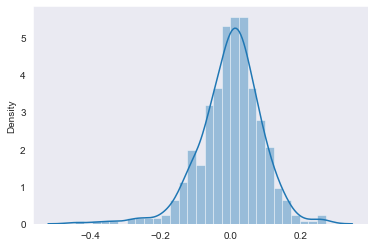

In [62]:
# computing the predicted values of y_train

y_train_pred = lr_model_05.predict(X_train_05)

# computing the residuals

res = y_train - y_train_pred

# plotting distplot to check for the distribution of the residuals

sns.distplot(res)
plt.show()

### As we see from the above plot, there is a normal distribution of the error terms or the residuals with a mean value of 0. Hence, our first assumption is verified.

### Assumption-2: Error terms have constant variance (homoscedasticity)

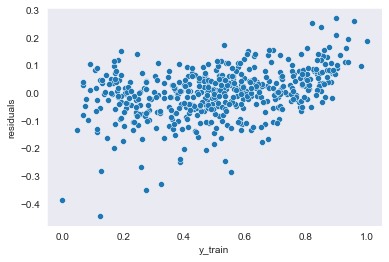

In [63]:
# plotting a scatter plot between residuals and y_train.

sns.scatterplot(x = y_train, y = res)
plt.xlabel('y_train')
plt.ylabel('residuals')
plt.show()

### We do not see any pattern really from the above scatter plot between the residuals and y_train. The residuals are distributed near the 0 and hence, we can say that mean is around 0 which is also visible from the distribution plot above.<br>Also, can we say that as the error terms clustered near the 0, the error terms also have constant variance.

# 5. Model Evaluation

## Steps:
- Preprocessing of test set
- Create X and y
- Make Predictions
- Evaluate the model

### Preprocessing the test set

In [64]:
# Creating a list of numeric variables whose scaling needs to be done

num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

# Transform the test set using the scaler used on train set

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

### Create X_test and y_test

In [65]:
y_test = df_test.pop('cnt')
X_test = df_test

In [66]:
# Considering only those variables that were considered in our final model.
# The list of those columns was saved in the variable 'X_train_new_05'

X_test_01 = X_test[X_train_new_05.columns]

### Making Predictions

In [67]:
# adding a constant

X_test_01 = sm.add_constant(X_test_01)

In [68]:
# predict y_test

y_test_pred = lr_model_05.predict(X_test_01)

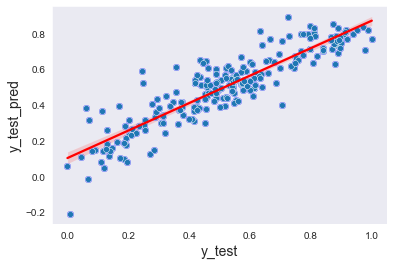

In [69]:
# Checking for predicted values of y_test against the actual values of y_test

sns.regplot(x=y_test, y=y_test_pred, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.scatterplot(y_test, y_test_pred)
plt.xlabel('y_test',fontsize=14)
plt.ylabel("y_test_pred",fontsize=14)
plt.show()

### As we see from the above plot, our model has predicted the values very well for test data as well.

### Evaluation of Model

In [70]:
# calculating the r-squared value for the test set

test_r2 = r2_score(y_true = y_test, y_pred = y_test_pred)
test_r2

0.8025198229561422

In [71]:
# calculating the r-aquared value for the train set which anyway was seen in th esummary statistics of our final model

train_r2 = r2_score(y_true = y_train, y_pred = y_train_pred)
train_r2

0.8432656173644423

In [72]:
# percentage difference between the r2_scores of the test and train set

percent_diff = round(((train_r2 - test_r2)/train_r2*100),1)
percent_diff

4.8

### As seen from the above, the difference between the r2_scores of the model on the train set and the test set is '4.8%' which is less than 5%. Hence, we can proceed with this model.

## Model Equation

In [73]:
# checking for the coefficients of constant and all the predictor variables

lr_model_05.params

const                    0.161463
yr                       0.235210
workingday               0.053118
atemp                    0.441271
windspeed               -0.152058
summer                   0.071942
winter                   0.124982
august                   0.053802
december                -0.060662
february                -0.058527
january                 -0.091687
november                -0.048413
september                0.097858
monday                   0.063464
Light_Snow_Light_Rain   -0.293286
Mist_Cloudy             -0.084733
3rd week                 0.028207
dtype: float64

### The model equation will be:

#### $cnt = 0.161463 + (0.235210 * yr) + (0.053118 * workingday) + (0.441271 * atemp) - (0.152058 * windspeed) + (0.071942 * summer) + (0.124982 * winter) + (0.053802 * august) - (0.060662 * december) - (0.058527 * february) - (0.091687 * january) - (0.048413 * november) + (0.097858 * september) + (0.063464 * monday) - (0.293286 * Light_Snow_Light_Rain) - (0.084733 * Mist_Cloudy) + (0.028207 * 3rd week)$

## Conclusions

### Below are the top 03 significant predictor variables:

__i.) atemp__: It has the highest coefficient value of 0.441271 that indicates that this variable has the highest impact on the target variable 'cnt'.<br>A unit increase in 'atemp' variable, increases the bikes demand by 0.441271 units. (as per our scaler)

__ii.) Light_Snow_Light_Rain__: It has the highest negative coefficient value of 0.293286 that indicates that this variable has the second highest impact on the target variable 'cnt'.<br>A unit increase in 'Light_Snow_Light_Rain' variable, decreases the bikes demand by 0.293286 units.

__iii.) yr__: It has the second highest positive coefficient value of 0.235210 that indicates that this variable has the third highest impact on the target variable 'cnt'.<br>A unit increase in 'yr' variable, increases the bikes demand by 0.0.235210 units.

### Furthermore, we can conclude the below points,

#### i.) Demand for shared bikes is going to increase with each year once the pandemic ends.<br><br>ii.) The best period for good business when the demand for bikes is the highest, is june to september.<br><br>iii.) The demand for bikes is low when there is Light Snow or Light Rain + Thunderstorm + Scattered clouds or Light Rain + Scattered clouds. but higher when the weather is Clear or there are Few clouds.<br><br>iv.) The bikes demand is lower on days when the humidity or windspeed is high.<br><br>iv.) The bikes demand is higher when there is no holiday. This can mean that most of the customers are working professionals who use bikes for daily commute to & from office.